<a href="https://colab.research.google.com/github/haripatel07/Smart_Agriculture_System/blob/main/Irrigation_schedule.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [81]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [82]:
#Reading the csv
dataframe = pd.read_csv("Irrigation Scheduling.csv")

In [83]:
#Displaying top 5 rows
dataframe.head()

,id,temperature,pressure,altitude,soilmiosture,note,status,class,date,time
0,1,29.10,9984.53,-12.21,377,0,0,Very Dry,08-10-2022,22:06:24
1,2,29.08,9984.36,-12.22,379,0,0,Very Dry,08-10-2022,22:06:24
2,3,29.06,9984.56,-12.20,376,0,0,Very Dry,08-10-2022,22:06:24
3,4,29.05,9984.39,-12.22,377,0,0,Very Dry,08-10-2022,22:06:24
4,5,29.03,9984.42,-12.21,379,0,0,Very Dry,08-10-2022,22:06:24


In [84]:
#Displaying bottom 5 rows
dataframe.tail()

,id,temperature,pressure,altitude,soilmiosture,note,status,class,date,time
4683,4684,29.34,9921.75,-17.49,327,1,0,Dry,08-10-2022,22:06:24
4684,4685,29.31,9921.45,-17.52,328,1,0,Dry,08-10-2022,22:06:24
4685,4686,29.29,9921.48,-17.51,328,1,0,Dry,08-10-2022,22:06:24
4686,4687,29.26,9921.51,-17.51,327,1,0,Dry,08-10-2022,22:06:24
4687,4688,29.28,9922.20,-17.45,323,1,0,Dry,08-10-2022,22:06:24


In [85]:
#Columns
dataframe.columns

Index(['id', 'temperature', 'pressure', 'altitude', 'soilmiosture', 'note',
       'status', 'class', 'date', 'time'],
      dtype='object')

In [86]:
#Displaying class
dataframe['class']

,class
0,Very Dry
1,Very Dry
2,Very Dry
3,Very Dry
4,Very Dry
...,...
4683,Dry
4684,Dry
4685,Dry
4686,Dry


In [87]:
#Checking the dimensions of the dataframe
dataframe.shape

(4688, 10)

In [88]:
#Describing data
dataframe.describe()

,id,temperature,pressure,altitude,soilmiosture,note,status
count,4688.000000,4688.000000,4688.000000,4682.000000,4688.000000,4688.000000,4688.000000
mean,2344.500000,29.599089,9963.153215,-14.291506,243.692406,1.878413,0.703712
std,1353.453361,5.842685,1383.602527,2.649815,76.176855,1.152977,0.456668
min,1.000000,27.970000,-2120.400000,-17.610000,-243.000000,0.000000,0.000000
25%,1172.750000,28.630000,9935.255000,-16.340000,171.000000,1.000000,0.000000
50%,2344.500000,29.180000,9969.535000,-13.470000,233.000000,2.000000,1.000000
75%,3516.250000,29.990000,9975.700000,-12.950000,326.000000,3.000000,1.000000
max,4688.000000,178.700000,99931.100000,116.700000,480.000000,3.000000,1.000000


In [89]:
#Info of dataframe
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4688 entries, 0 to 4687
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            4688 non-null   int64  
 1   temperature   4688 non-null   float64
 2   pressure      4688 non-null   float64
 3   altitude      4682 non-null   float64
 4   soilmiosture  4688 non-null   int64  
 5   note          4688 non-null   int64  
 6   status        4688 non-null   int64  
 7   class         4688 non-null   object 
 8   date          4688 non-null   object 
 9   time          4688 non-null   object 
dtypes: float64(3), int64(4), object(3)
memory usage: 366.4+ KB


In [90]:
#Checking for unique values
dataframe.nunique()

,0
id,4688
temperature,426
pressure,2593
altitude,555
soilmiosture,262
note,4
status,2
class,4
date,1
time,1


In [91]:
#Dropping unnecessary columns: Here id, date and time
modified_df = dataframe.drop(columns = {'id', 'date', 'time'})
modified_df.head()

,temperature,pressure,altitude,soilmiosture,note,status,class
0,29.10,9984.53,-12.21,377,0,0,Very Dry
1,29.08,9984.36,-12.22,379,0,0,Very Dry
2,29.06,9984.56,-12.20,376,0,0,Very Dry
3,29.05,9984.39,-12.22,377,0,0,Very Dry
4,29.03,9984.42,-12.21,379,0,0,Very Dry


In [92]:
#Checking for null values
modified_df.isnull().sum()

,0
temperature,0
pressure,0
altitude,6
soilmiosture,0
note,0
status,0
class,0


In [93]:
#Filling the null values in 'altitude' column
modified_df['altitude'] = modified_df['altitude'].fillna(modified_df['altitude'].mean())
modified_df.isnull().sum()

,0
temperature,0
pressure,0
altitude,0
soilmiosture,0
note,0
status,0
class,0


In [94]:
#Checking count of each class
modified_df['class'].value_counts()

,count
class,
Very Wet,1842
Wet,1457
Very Dry,1023
Dry,366


<Axes: xlabel='class', ylabel='count'>

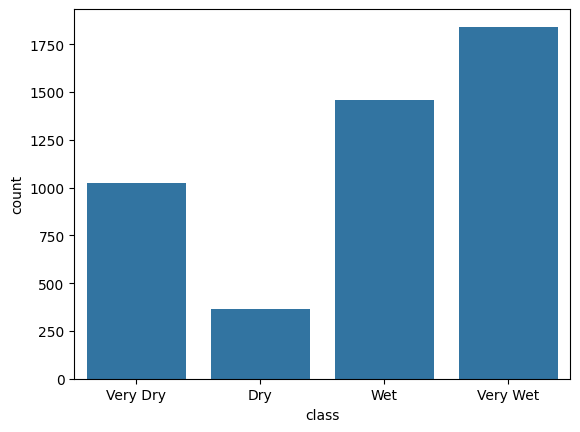

In [95]:
#Visualizing the class column
sns.countplot(x = 'class', data = modified_df)

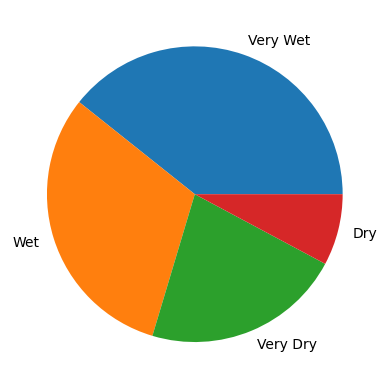

In [96]:
#Pie plot
plt.pie(modified_df['class'].value_counts(), labels = modified_df['class'].value_counts().index)
plt.show()

In [97]:
#Here we will use label encoding, since there is a natural ordinal order
from sklearn.preprocessing import OrdinalEncoder
# Define the correct order of moisture levels
custom_order = [["Very Dry", "Dry", "Wet", "Very Wet"]]

# Initialize OrdinalEncoder with the predefined order
oe = OrdinalEncoder(categories=custom_order)
modified_df['class'] = oe.fit_transform(modified_df[['class']])
modified_df.head()

,temperature,pressure,altitude,soilmiosture,note,status,class
0,29.10,9984.53,-12.21,377,0,0,0.0
1,29.08,9984.36,-12.22,379,0,0,0.0
2,29.06,9984.56,-12.20,376,0,0,0.0
3,29.05,9984.39,-12.22,377,0,0,0.0
4,29.03,9984.42,-12.21,379,0,0,0.0


In [98]:
modified_df['class'].value_counts()

,count
class,
3.0,1842
2.0,1457
0.0,1023
1.0,366


# Checking for **correlations**

In [99]:
correlations = modified_df.corr()   #Leaving date and time
correlations

,temperature,pressure,altitude,soilmiosture,note,status,class
temperature,1.000000,0.069229,0.286981,-0.139279,0.034205,0.028588,0.034205
pressure,0.069229,1.000000,0.697150,-0.054813,-0.007703,0.003589,-0.007703
altitude,0.286981,0.697150,1.000000,-0.133952,0.076151,0.087718,0.076151
soilmiosture,-0.139279,-0.054813,-0.133952,1.000000,-0.969905,-0.894602,-0.969905
note,0.034205,-0.007703,0.076151,-0.969905,1.000000,0.908939,1.000000
status,0.028588,0.003589,0.087718,-0.894602,0.908939,1.000000,0.908939
class,0.034205,-0.007703,0.076151,-0.969905,1.000000,0.908939,1.000000


<Axes: >

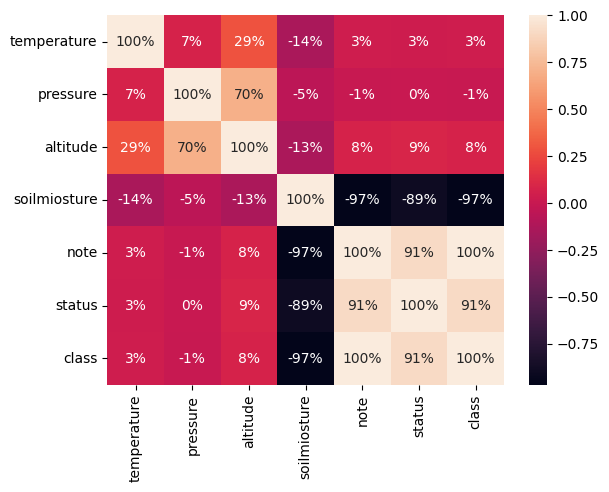

In [100]:
#Visualize the correlation of above data using heatmap
sns.heatmap(correlations, annot=True,fmt='.0%')

# MODELS

In [101]:
#Dividing the data into X and y
#Here label will be the class
X = modified_df.iloc[:, 0:4].values  #Independent dataset
Y = modified_df.iloc[:, 6].values    #Dependent dataset
print(X)
print(Y)

[[  29.1  9984.53  -12.21  377.  ]
 [  29.08 9984.36  -12.22  379.  ]
 [  29.06 9984.56  -12.2   376.  ]
 ...
 [  29.29 9921.48  -17.51  328.  ]
 [  29.26 9921.51  -17.51  327.  ]
 [  29.28 9922.2   -17.45  323.  ]]
[0. 0. 0. ... 1. 1. 1.]


In [102]:
#Splitting dataset into 80% training and 20% testing
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state = 42, shuffle = True, stratify = Y)

In [103]:
#Scaling the data using Standard Scaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [128]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score

lr_classifier = LogisticRegression(C = 0.1, random_state = 42)
lr_classifier.fit(X_train, Y_train)
y_pred_lr = lr_classifier.predict(X_test)
accuracy_lr = accuracy_score(Y_test, y_pred_lr)
print("Accuracy:", accuracy_lr)


Accuracy: 0.9211087420042644


In [105]:
#Confusion Matrix
cm_lr = confusion_matrix(Y_test, y_pred_lr)
print(cm_lr)

[[205   0   0   0]
 [ 63   2   8   0]
 [  0   0 288   3]
 [  0   0   0 369]]


In [106]:
#Classification report
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_pred_lr))

              precision    recall  f1-score   support

         0.0       0.76      1.00      0.87       205
         1.0       1.00      0.03      0.05        73
         2.0       0.97      0.99      0.98       291
         3.0       0.99      1.00      1.00       369

    accuracy                           0.92       938
   macro avg       0.93      0.75      0.72       938
weighted avg       0.94      0.92      0.89       938



In [131]:
lr_cv_scores = cross_val_score(lr_classifier, sc.transform(X), Y, cv=5)
print(f"5-Fold CV Accuracy: {lr_cv_scores.mean():.4f} (+/- {lr_cv_scores.std() * 2:.4f})")

5-Fold CV Accuracy: 0.9249 (+/- 0.0221)


In [107]:
#Fitting the Gaussian Naive Bayes Classifier model on X and Y
from sklearn.naive_bayes import GaussianNB

nb_classifier = GaussianNB()
nb_classifier.fit(X_train, Y_train)
y_pred_nb = nb_classifier.predict(X_test)
accuracy_nb = accuracy_score(Y_test, y_pred_nb)
print("Accuracy:", accuracy_nb)

Accuracy: 0.9509594882729211


In [108]:
#Confusion Matrix
cm_nb = confusion_matrix(Y_test, y_pred_nb)
print(cm_nb)

[[188  17   0   0]
 [ 28  45   0   0]
 [  1   0 290   0]
 [  0   0   0 369]]


In [109]:
#Classification Report
print(classification_report(Y_test, y_pred_nb))

              precision    recall  f1-score   support

         0.0       0.87      0.92      0.89       205
         1.0       0.73      0.62      0.67        73
         2.0       1.00      1.00      1.00       291
         3.0       1.00      1.00      1.00       369

    accuracy                           0.95       938
   macro avg       0.90      0.88      0.89       938
weighted avg       0.95      0.95      0.95       938



In [132]:
# 5-fold Cross-Validation
nb_cv_scores = cross_val_score(nb_classifier, sc.transform(X), Y, cv=5)
print(f"5-Fold CV Accuracy: {nb_cv_scores.mean():.4f} (+/- {nb_cv_scores.std() * 2:.4f})")

5-Fold CV Accuracy: 0.9221 (+/- 0.1434)


In [110]:
#SVM
from sklearn.svm import SVC

svm_classifier = SVC(kernel = 'linear', C = 0.1, random_state = 42)
svm_classifier.fit(X_train, Y_train)
y_pred_svm = svm_classifier.predict(X_test)
accuracy_svm = accuracy_score(Y_test, y_pred_svm)
print("Accuracy:", accuracy_svm)

Accuracy: 0.9552238805970149


In [111]:
#Confusion Matrix
cm_svm = confusion_matrix(Y_test, y_pred_svm)
print(cm_svm)

[[205   0   0   0]
 [ 35  32   6   0]
 [  0   0 291   0]
 [  0   0   1 368]]


In [112]:
#Classification Report
print(classification_report(Y_test, y_pred_svm))

              precision    recall  f1-score   support

         0.0       0.85      1.00      0.92       205
         1.0       1.00      0.44      0.61        73
         2.0       0.98      1.00      0.99       291
         3.0       1.00      1.00      1.00       369

    accuracy                           0.96       938
   macro avg       0.96      0.86      0.88       938
weighted avg       0.96      0.96      0.95       938



In [127]:
# 5-fold Cross-Validation
svm_cv_scores = cross_val_score(svm_classifier, sc.transform(X), Y, cv=5)
print(f"5-Fold CV Accuracy: {svm_cv_scores.mean():.4f} (+/- {svm_cv_scores.std() * 2:.4f})")

5-Fold CV Accuracy: 0.9326 (+/- 0.0508)


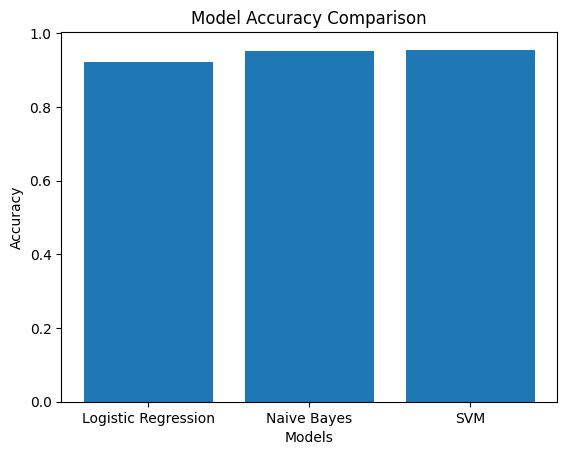

In [119]:
#Plotting the different amongst the models
models = ['Logistic Regression', 'Naive Bayes', 'SVM']
accuracy = [accuracy_lr, accuracy_nb, accuracy_svm]

plt.bar(models, accuracy)
plt.title("Model Accuracy Comparison")
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.show()

In [121]:
#Check if the models are overfitting are not
y_train_pred_lr = lr_classifier.predict(X_train)
lr_train_acc = accuracy_score(Y_train, y_train_pred_lr)
print("Logistic Regression Training Accuracy:", accuracy_score(Y_train, y_train_pred_lr))
print("Logistic Regression Test Accuracy:", accuracy_lr)

y_train_pred_nb = nb_classifier.predict(X_train)
nb_train_acc = accuracy_score(Y_train, y_train_pred_nb)
print("Naive Bayes Training Accuracy:", accuracy_score(Y_train, y_train_pred_nb))
print("Naive Bayes Test Accuracy:", accuracy_nb)

y_train_pred_svm = svm_classifier.predict(X_train)
svm_train_acc = accuracy_score(Y_train, y_train_pred_svm)
print("SVM Training Accuracy:", accuracy_score(Y_train, y_train_pred_svm))
print("SVM Test Accuracy:", accuracy_svm)

Logistic Regression Training Accuracy: 0.9208
Logistic Regression Test Accuracy: 0.9211087420042644
Naive Bayes Training Accuracy: 0.9434666666666667
Naive Bayes Test Accuracy: 0.9509594882729211
SVM Training Accuracy: 0.9573333333333334
SVM Test Accuracy: 0.9552238805970149


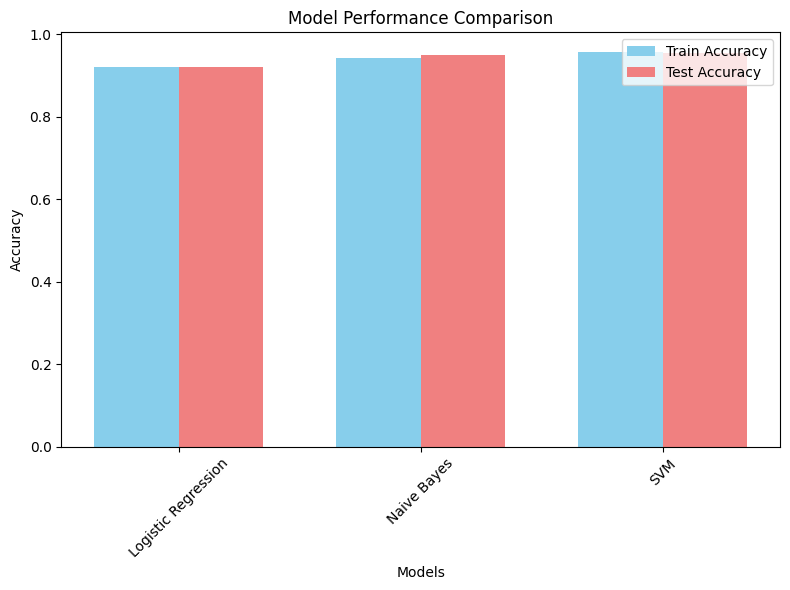

In [123]:
# Visualize model comparison
plt.figure(figsize=(8, 6))
model_names = ["Logistic Regression", "Naive Bayes", "SVM"]
train_accs = [lr_train_acc, nb_train_acc, svm_train_acc]
test_accs = [accuracy_lr, accuracy_nb, accuracy_svm]
x = np.arange(len(model_names))
width = 0.35

plt.bar(x - width/2, train_accs, width, label='Train Accuracy', color='skyblue')
plt.bar(x + width/2, test_accs, width, label='Test Accuracy', color='lightcoral')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Performance Comparison')
plt.xticks(x, model_names, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()